In [2]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../../../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Data_Sets/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)   

In [3]:
%matplotlib inline
import numpy as np
import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display

from grafica import *
from ClassPerceptron import Perceptron

# Ajustar el tamaño predeterminado de las figuras
plt.rcParams['figure.figsize'] = [4,3]

### Ejemplos de la función AND

In [4]:
# Ejemplos de entrada de la función AND
X = np.array([[0,0], [0,1],[1,0],[1,1]])

#-- Respuesta esperada para cada ejemplo
T = np.array([0,0,0,1])

### Entrenamiento del perceptrón

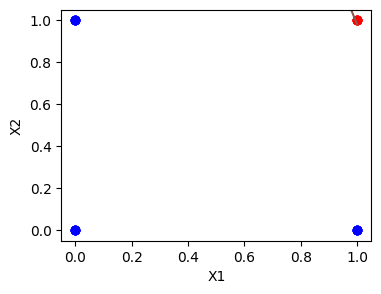

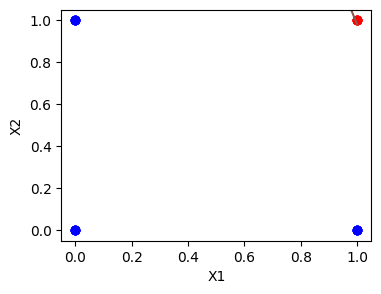

In [5]:
plt.clf()
ppn = Perceptron(alpha=0.15, n_iter=30, draw=1, title=['X1', 'X2'])
# --- utilice random_state=None para que los pesos se inicializacen en forma aleatoria --
ppn.fit(X, T)

### Pesos obtenidos luego del entrenamiento

In [6]:
print("W = ", ppn.w_)
print("b = ", ppn.b_)

W =  [0.18064327 0.05564819]
b =  -0.23518148404588413


### Cantidad de errores por iteración

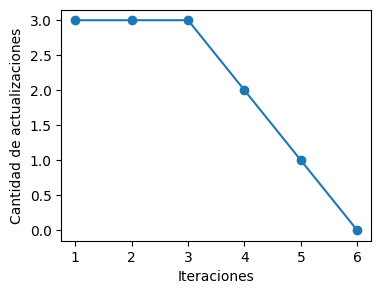

In [7]:
plt.clf()
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

#### Visualización de la clasificación

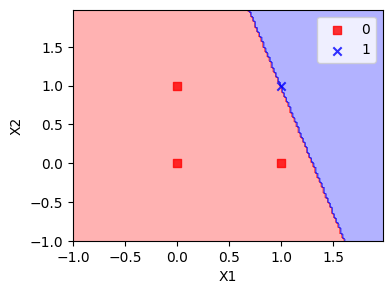

In [8]:
from PlotRegiones import plot_decision_regions

plot_decision_regions(X, T, classifier=ppn)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper right')
plt.show()

#### Aplicando el perceptrón a los ejemplos de entrenamiento

In [9]:
Y = ppn.predict(X)
print("Y = ", Y)
print("T = ", T)
aciertos = sum(Y == T)
print("aciertos = ", aciertos)
nAciertos = sum(Y==T)
print("%% de aciertos = %.2f %%" % (100*nAciertos/X.shape[0]))

Y =  [0 0 0 1]
T =  [0 0 0 1]
aciertos =  4
% de aciertos = 100.00 %


#### Métricas

In [10]:
from sklearn import metrics

# T es un vector binario con las respuestas esperadas para los 4 ejemplos del AND
# Y es el resultado de la predicción del perceptrón para los mismos ejemplos

MM = metrics.confusion_matrix(T,Y)
print("Matriz de confusión:\n%s" % MM)

report = metrics.classification_report(T,Y)
print("\nResultado de la clasificación:\n%s" % report)

accuracy = metrics.accuracy_score(T,Y)
print("\nAccuracy: ", 100*accuracy, '%')

Matriz de confusión:
[[3 0]
 [0 1]]

Resultado de la clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


Accuracy:  100.0 %
